<a href="https://colab.research.google.com/github/Gautham805/multiple-linear-regression/blob/master/DA_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


data = pd.read_csv("/content/cars.csv")
data


,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5071,13,253,201,Front-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,18,Gasoline,25,Automatic transmission,2012 Honda Pilot EX-L,Honda,2012 Honda Pilot,2012,250,253
5072,141,249,108,All-wheel drive,Lamborghini 5.2L 10 cylinder 552 hp 398 ft-lbs,True,6,6 Speed Manual,12,Gasoline,20,Manual transmission,2012 Lamborghini Gallardo Coupe LP 560-4,Lamborghini,2012 Lamborghini Gallardo Coup,2012,552,398
5073,160,249,108,All-wheel drive,Lamborghini 5.2L 10 cylinder 552 hp 398 ft-lbs,True,6,6 Speed Manual,12,Gasoline,20,Manual transmission,2012 Lamborghini Gallardo LP 560-4 Spyder,Lamborghini,2012 Lamborghini Gallardo Spyder,2012,552,398
5074,200,210,110,Rear-wheel drive,BMW 3.0L 6 cylinder 315hp 330 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,17,Gasoline,25,Automatic transmission,2012 BMW 740i Sedan,BMW,2012 BMW 7 Series,2012,315,330


In [ ]:
print("Dataset Dimensions:", data.shape)

Dataset Dimensions: (5076, 18)


In [ ]:
print("Number of Instances:", data.shape[0])


Number of Instances: 5076


In [ ]:
print(data.duplicated().sum())
data=data.drop_duplicates()
data.duplicated().sum()


18


0

In [ ]:
missing_vals = data.isnull().sum()
print("Missing Values:\n", missing_vals)
data = data.dropna()

Missing Values:
 Dimensions.Height                                  0
Dimensions.Length                                  0
Dimensions.Width                                   0
Engine Information.Driveline                       0
Engine Information.Engine Type                     0
Engine Information.Hybrid                          0
Engine Information.Number of Forward Gears         0
Engine Information.Transmission                    0
Fuel Information.City mpg                          0
Fuel Information.Fuel Type                         0
Fuel Information.Highway mpg                       0
Identification.Classification                      0
Identification.ID                                  0
Identification.Make                                0
Identification.Model Year                          0
Identification.Year                                0
Engine Information.Engine Statistics.Horsepower    0
Engine Information.Engine Statistics.Torque        0
dtype: int64


In [ ]:
categorical_vars = data.select_dtypes(include=["object"])
print("Categorical Variables:", categorical_vars.columns.tolist())

Categorical Variables: ['Engine Information.Driveline', 'Engine Information.Engine Type', 'Engine Information.Transmission', 'Fuel Information.Fuel Type', 'Identification.Classification', 'Identification.ID', 'Identification.Make', 'Identification.Model Year']


In [ ]:
categorical_var=data.select_dtypes(include=["object",'bool'])
c=0
for name in categorical_var:
  c+=1
  print(c,':',name)

1 : Engine Information.Driveline
2 : Engine Information.Engine Type
3 : Engine Information.Hybrid
4 : Engine Information.Transmission
5 : Fuel Information.Fuel Type
6 : Identification.Classification
7 : Identification.ID
8 : Identification.Make
9 : Identification.Model Year


In [ ]:
target = "Fuel Information.City mpg"

In [ ]:
num_features = [
    "Dimensions.Height", "Dimensions.Length", "Dimensions.Width",
    "Engine Information.Number of Forward Gears", "Engine Information.Engine Statistics.Horsepower",
    "Engine Information.Engine Statistics.Torque", "Engine Information.Hybrid"
]
categorical_features = ["Engine Information.Driveline", "Engine Information.Transmission", "Fuel Information.Fuel Type"]


In [ ]:
numerical_vars = data.select_dtypes(include=['int64', 'float64'])
print("Number of Numerical Variables:", numerical_vars.shape[1])
print("Numerical Variables:", numerical_vars.columns.tolist())

Number of Numerical Variables: 9
Numerical Variables: ['Dimensions.Height', 'Dimensions.Length', 'Dimensions.Width', 'Engine Information.Number of Forward Gears', 'Fuel Information.City mpg', 'Fuel Information.Highway mpg', 'Identification.Year', 'Engine Information.Engine Statistics.Horsepower', 'Engine Information.Engine Statistics.Torque']


In [ ]:
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

In [ ]:
data["Engine Information.Hybrid"] = data["Engine Information.Hybrid"].astype(int)
for col in num_features:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

print("Outliers removed using IQR method.")


Outliers removed using IQR method.


In [ ]:
X = data[num_features + [col for col in data.columns if col.startswith(tuple(categorical_features))]]
y = data[target]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)

In [ ]:
print(f"MAE: {MAE:.4f}")
print(f"MSE: {MSE:.4f}")
print(f"RMSE: {RMSE:.4f}")
print(f"R²: {R2:.4f}")


MAE: 1.5711
MSE: 4.4921
RMSE: 2.1195
R²: 0.7857


In [ ]:
print("Model Evaluation: MAE, MSE, RMSE, and R² scores used to assess regression performance.")

Model Evaluation: MAE, MSE, RMSE, and R² scores used to assess regression performance.


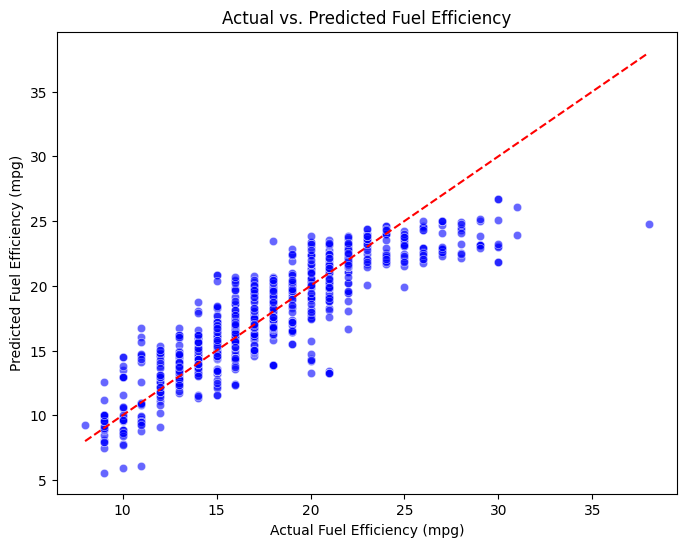

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.xlabel("Actual Fuel Efficiency (mpg)")
plt.ylabel("Predicted Fuel Efficiency (mpg)")
plt.title("Actual vs. Predicted Fuel Efficiency")
plt.show()

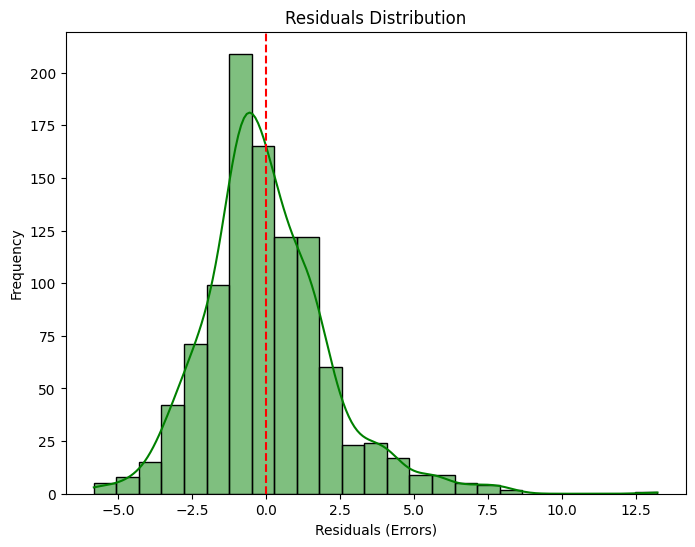

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=25, color="green")
plt.axvline(x=0, color="red", linestyle="--")
plt.xlabel("Residuals (Errors)")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.show()

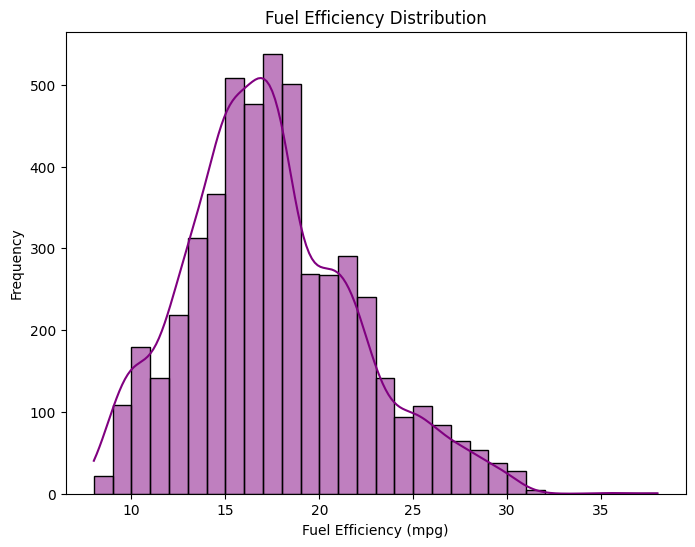

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(y, kde=True, bins=30, color="purple")
plt.xlabel("Fuel Efficiency (mpg)")
plt.ylabel("Frequency")
plt.title("Fuel Efficiency Distribution")
plt.show()

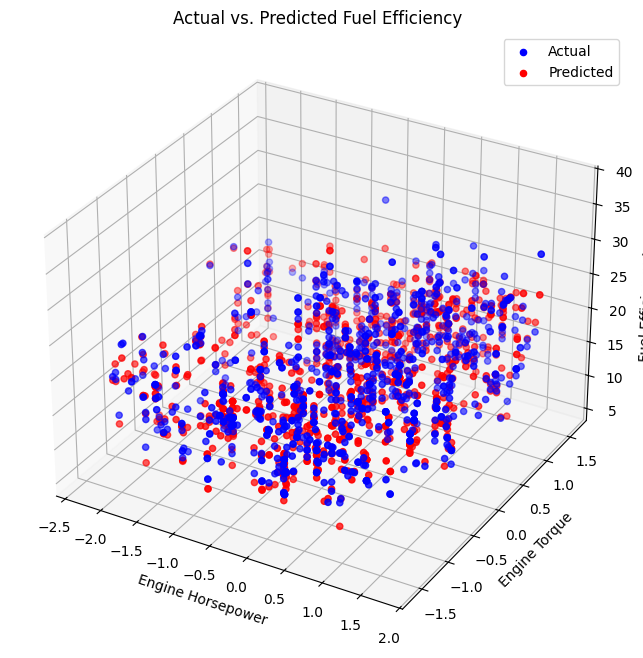

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, color='blue', label='Actual')
ax.scatter(X_test[:, 0], X_test[:, 1], y_pred, color='red', label='Predicted')

ax.set_xlabel('Engine Horsepower')
ax.set_ylabel('Engine Torque')
ax.set_zlabel('Fuel Efficiency (mpg)')
ax.set_title('Actual vs. Predicted Fuel Efficiency')
ax.legend()
plt.show()